In [1]:
import QuantLib as ql
import numpy as np
import random
import math

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
def callpayoff(S):
    if S >= K:
        return S - K
    else:
        return 0
def putpayoff(S):
    if S <= K:
        return K - S
    else:
        return 0

In [28]:
pathNum = int(input('請輸入要模擬的路徑數量:'))
maturity = int(input('請輸入到期年數:'))
sigma = float(input('請輸入波動率(sigma):'))
fwr = float(input('請輸入遠期利率:'))
r = float(input('請輸入無風險年利率:'))
S0 = float(input('請輸入現在股價:'))
K = float(input('請輸入履約價格:'))
a = float(input('請輸入Hull-White內的a:'))
steps = int(input('請輸入欲模擬步數:'))
day_count = ql.Thirty360()
today = ql.Date(5,12,2020)

請輸入要模擬的路徑數量:100
請輸入到期年數:3
請輸入波動率(sigma):0.1
請輸入遠期利率:0.05
請輸入無風險年利率:0.01
請輸入現在股價:100
請輸入履約價格:95
請輸入Hull-White內的a:0.1
請輸入欲模擬步數:3600


In [29]:
dt = maturity*360/steps
ql.Settings.instance().evaluationDate = today

spot_curve = ql.FlatForward(today, ql.QuoteHandle(ql.SimpleQuote(fwr)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

In [30]:
hull_white = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(steps, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hull_white, maturity, steps, rng, False)

In [31]:
def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

In [32]:
def genBrownPath (T, mu, sigma_stock, s_0, dt):
    W = [0] + np.random.standard_normal(size = 1) 
    W = (W + np.random.standard_normal(size = 1))*dt**(1/2)

    stock = []
    for i in range (steps + 1):
        X = (mu[i]-0.5*sigma_stock**2)*time[i] + sigma_stock*W 
        S = s_0*np.exp(X) 
        stock.append(S)
    return np.array(stock)

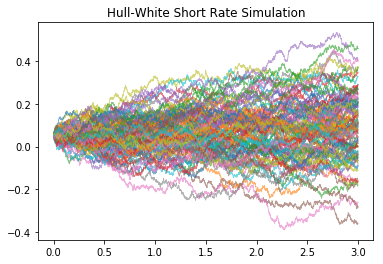

In [33]:
time, paths = generate_paths(pathNum, steps)
for i in range(pathNum):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.show()

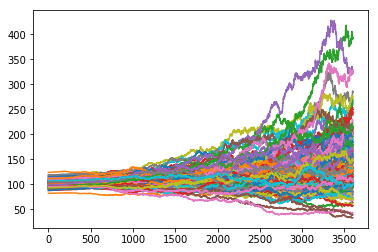

In [34]:
call = []
put = []
fig = plt.figure()
for i in range(pathNum):
    stockprice = genBrownPath(steps, paths[i, :], sigma, S0, dt)
    plt.plot(stockprice)
    call.append(callpayoff(stockprice[steps-1]))
    put.append(putpayoff(stockprice[steps-1]))
call = np.array(call)
put = np.array(put)
mean_call = np.mean(call)
mean_put = np.mean(put)

In [35]:
ans_call = mean_call/math.exp(maturity*r)
ans_put = mean_put/math.exp(maturity*r)

In [36]:
print('call的合理價格為:', mean_call)
print('put的合理價格為:', mean_put)

call的合理價格為: [55.69833559]
put的合理價格為: [5.15121664]
